In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import joblib
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
storeSales = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS7M_IocsHrC7SorozfvMEKQFOJLztEdi4uAECtbaAapFF3BDG5Sd8BjkUJtEwJ_Z_xiSsBJOwdLyc3/pub?gid=250931044&single=true&output=csv")
storeSales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
storeSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
storeSales = storeSales.drop(["Unnamed: 0"], axis = 1)
storeSales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Visualization

In [ ]:
tv = storeSales["TV"]
radio = storeSales ["Radio"]
newspaper = storeSales["Newspaper"]
sales = storeSales["Sales"]

Hexagonal Binning

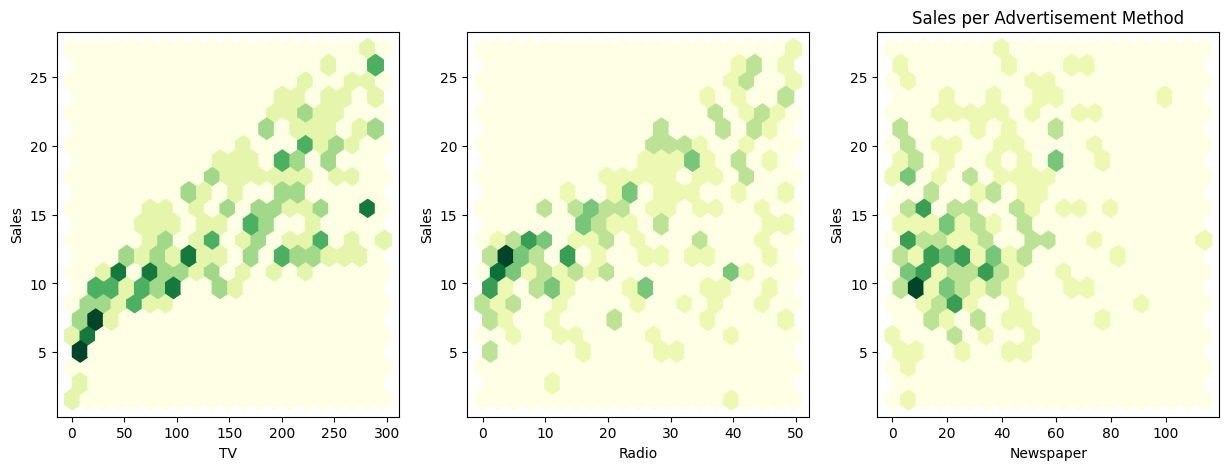

In [ ]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hexbin(tv, sales, gridsize=20, cmap='YlGn')
axis[0].set_xlabel('TV')
axis[0].set_ylabel('Sales')

axis[1].hexbin(radio, sales, gridsize=20, cmap='YlGn')
axis[1].set_xlabel('Radio')
axis[1].set_ylabel('Sales')

axis[2].hexbin(newspaper, sales, gridsize=20, cmap='YlGn')
axis[2].set_xlabel('Newspaper')
axis[2].set_ylabel('Sales')

plt.title("Sales per Advertisement Method")
plt.show()

Variable Dependency analysis

In [ ]:
X = storeSales[["TV", "Radio", "Newspaper"]]
Y = storeSales["Sales"]

X = sm.add_constant(X)
storeSales_lm = sm.OLS(Y, X).fit()

print(storeSales_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        18:21:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


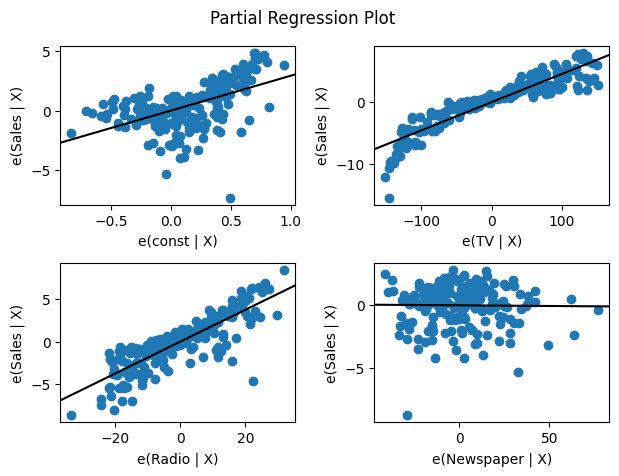

In [ ]:
fig = sm.graphics.plot_partregress_grid(storeSales_lm)
fig.tight_layout(pad=1.0)

In [ ]:
def sigmoidVariant(x):
    return (70/(1+(2**(5-(0.2)*x))))*20

In [ ]:
storeSales["salesForPlot"] = storeSales['Sales'].apply(lambda x: sigmoidVariant(x))
storeSales.head()

,TV,Radio,Newspaper,Sales,salesForPlot
0,230.1,37.8,69.2,22.1,561.156150
1,44.5,39.3,45.1,10.4,163.389898
2,17.2,45.9,69.3,9.3,142.635317
3,151.5,41.3,58.5,18.5,404.356791
4,180.8,10.8,58.4,12.9,220.413078


In [ ]:
fig = px.scatter_3d(storeSales, x = "Radio", y = "TV", z = "Newspaper", size = "salesForPlot", color = "Sales", hover_data = ["Sales"])

fig.update_layout(
    scene = dict(
        xaxis = dict(ticks="inside"),
        yaxis = dict(ticks="inside"),
        zaxis = dict(ticks="inside"),
    ),
    width=800, height=720
)

fig.show()

In [ ]:
storeSales = storeSales.drop(["salesForPlot"], axis = 1)

Splitting Dataset

In [ ]:
X = storeSales[['TV', 'Radio', 'Newspaper']]
Y = storeSales['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



Model Training

In [ ]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
randomForest = RandomForestRegressor()
randomForest.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predicting Based on Test Dataset

In [ ]:
linearRegressor_prediction = linearRegressor.predict(X_test)
randomForest_prediction = randomForest.predict(X_test)
xgb_prediction = xgb.predict(X_test)

Model Evaluation

In [ ]:
score_linearRegressor = metrics.r2_score(Y_test, linearRegressor_prediction)
score_randomForest = metrics.r2_score(Y_test, randomForest_prediction)
score_xgb = metrics.r2_score(Y_test, xgb_prediction)

In [ ]:
r2Scores = pd.DataFrame({'Models': ['Linear Regressor', 'Random Forest Regressor', 'XGB Regressor'],
              'R2 Score': [score_linearRegressor, score_randomForest, score_xgb]})

In [ ]:
r2Scores

,Models,R2 Score
0,Linear Regressor,0.860115
1,Random Forest Regressor,0.975600
2,XGB Regressor,0.975658


Saving the Model

In [ ]:
xgb = XGBRegressor()
xgb_final = xgb.fit(X, Y)

In [ ]:
joblib.dump(xgb_final, "salesPredictor")

['salesPredictor']

In [ ]:
model = joblib.load("salesPredictor")

Predicting New Data

In [ ]:
tv = float(input("Enter Television Funding:"))
radio = float(input("Enter Radio Funding:"))
newspaper = float(input("Enter Newspaper Funding:"))

newData = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [newspaper]
})

print("Sales:", model.predict(newData))

Enter Television Funding:184.5
Enter Radio Funding:45.2
Enter Newspaper Funding:125
Sales: [21.846947]
